# Superstore Dataset

## Import Libraries

In [1]:
# import necessary libraries
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
import plotly.subplots as sp
from plotly.subplots import make_subplots
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# checking for the encoding
import chardet

data_path = "dataset\superstore.csv"
with open(data_path, 'rb') as f:
    result = chardet.detect(f.read())
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [3]:
# load the data
df = pd.read_csv(data_path, encoding=result['encoding'])
# print(df)

In [4]:
df.columns.unique()

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
# Check unique values for selected columns
for feature in ['Segment', 'Country', 'State', 'Region', 'Category', 'Sub-Category', 'Ship Mode']:
    feature_unique = df[feature].unique()
    print(feature, len(feature_unique), 'unique values are:', feature_unique)

Segment 3 unique values are: ['Consumer' 'Corporate' 'Home Office']
Country 1 unique values are: ['United States']
State 49 unique values are: ['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']
Region 4 unique values are: ['South' 'West' 'Central' 'East']
Category 3 unique values are: ['Furniture' 'Office Supplies' 'Technology']
Sub-Category 17 unique values are: ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Applian

In [6]:
# drop unused columns
df = df.drop(columns=['Ship Date', 'Ship Mode', 'Country', 'Postal Code', 'Row ID', 'Customer Name'])
df.head()

Order ID  Order Date Customer ID    Segment             City  \
0  CA-2016-152156   11/8/2016    CG-12520   Consumer        Henderson   
1  CA-2016-152156   11/8/2016    CG-12520   Consumer        Henderson   
2  CA-2016-138688   6/12/2016    DV-13045  Corporate      Los Angeles   
3  US-2015-108966  10/11/2015    SO-20335   Consumer  Fort Lauderdale   
4  US-2015-108966  10/11/2015    SO-20335   Consumer  Fort Lauderdale   

        State Region       Product ID         Category Sub-Category  \
0    Kentucky  South  FUR-BO-10001798        Furniture    Bookcases   
1    Kentucky  South  FUR-CH-10000454        Furniture       Chairs   
2  California   West  OFF-LA-10000240  Office Supplies       Labels   
3     Florida  South  FUR-TA-10000577        Furniture       Tables   
4     Florida  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [7]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9994 non-null   object 
 1   Order Date    9994 non-null   object 
 2   Customer ID   9994 non-null   object 
 3   Segment       9994 non-null   object 
 4   City          9994 non-null   object 
 5   State         9994 non-null   object 
 6   Region        9994 non-null   object 
 7   Product ID    9994 non-null   object 
 8   Category      9994 non-null   object 
 9   Sub-Category  9994 non-null   object 
 10  Product Name  9994 non-null   object 
 11  Sales         9994 non-null   float64
 12  Quantity      9994 non-null   int64  
 13  Discount      9994 non-null   float64
 14  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(11)
memory usage: 1.1+ MB


In [8]:
# convert df['Order Date] to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Customer ID   9994 non-null   object        
 3   Segment       9994 non-null   object        
 4   City          9994 non-null   object        
 5   State         9994 non-null   object        
 6   Region        9994 non-null   object        
 7   Product ID    9994 non-null   object        
 8   Category      9994 non-null   object        
 9   Sub-Category  9994 non-null   object        
 10  Product Name  9994 non-null   object        
 11  Sales         9994 non-null   float64       
 12  Quantity      9994 non-null   int64         
 13  Discount      9994 non-null   float64       
 14  Profit        9994 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int6

In [9]:
df.describe(include='all').T

count unique              top  freq  \
Order ID        9994   5009   CA-2017-100111    14   
Order Date      9994    NaN              NaN   NaN   
Customer ID     9994    793         WB-21850    37   
Segment         9994      3         Consumer  5191   
City            9994    531    New York City   915   
State           9994     49       California  2001   
Region          9994      4             West  3203   
Product ID      9994   1862  OFF-PA-10001970    19   
Category        9994      3  Office Supplies  6026   
Sub-Category    9994     17          Binders  1523   
Product Name    9994   1850  Staple envelope    48   
Sales         9994.0    NaN              NaN   NaN   
Quantity      9994.0    NaN              NaN   NaN   
Discount      9994.0    NaN              NaN   NaN   
Profit        9994.0    NaN              NaN   NaN   

                                       mean                  min  \
Order ID                                NaN                  NaN   
Order Date    2016-04-30 00:07:12.259355648  2014-01-03 00:00:00   
Customer ID                             NaN                  NaN   
Segment                                 NaN                  NaN   
City                                    NaN                  NaN   
State                                   NaN                  NaN   
Region                                  NaN                  NaN   
Product ID                              NaN                  NaN   
Category                                NaN                  NaN   
Sub-Category                            NaN                  NaN   
Product Name                            NaN                  NaN   
Sales                            229.858001                0.444   
Quantity                           3.789574                  1.0   
Discount                           0.156203                  0.0   
Profit                            28.656896            -6599.978   

                              25%                  50%                  75%  \
Order ID                      NaN                  NaN                  NaN   
Order Date    2015-05-23 00:00:00  2016-06-26 00:00:00  2017-05-14 00:00:00   
Customer ID                   NaN                  NaN                  NaN   
Segment                       NaN                  NaN                  NaN   
City                          NaN                  NaN                  NaN   
State                         NaN                  NaN                  NaN   
Region                        NaN                  NaN                  NaN   
Product ID                    NaN                  NaN                  NaN   
Category                      NaN                  NaN                  NaN   
Sub-Category                  NaN                  NaN                  NaN   
Product Name                  NaN                  NaN                  NaN   
Sales                       17.28                54.49               209.94   
Quantity                      2.0                  3.0                  5.0   
Discount                      0.0                  0.2                  0.2   
Profit                    1.72875               8.6665               29.364   

                              max         std  
Order ID                      NaN         NaN  
Order Date    2017-12-30 00:00:00         NaN  
Customer ID                   NaN         NaN  
Segment                       NaN         NaN  
City                          NaN         NaN  
State                         NaN         NaN  
Region                        NaN         NaN  
Product ID                    NaN         NaN  
Category                      NaN         NaN  
Sub-Category                  NaN         NaN  
Product Name                  NaN         NaN  
Sales                    22638.48  623.245101  
Quantity                     14.0     2.22511  
Discount                      0.8    0.206452  
Profit                   8399.976  234.260108

In [10]:
#check missing value
df.isnull().values.any()

False

In [11]:
# check duplicates
dup = df.loc[df.duplicated()]
dup

Order ID Order Date Customer ID      Segment      City State  \
3406  US-2014-150119 2014-04-23    LB-16795  Home Office  Columbus  Ohio   

     Region       Product ID   Category Sub-Category  \
3406   East  FUR-CH-10002965  Furniture       Chairs   

                                           Product Name    Sales  Quantity  \
3406  Global Leather Highback Executive Chair with P...  281.372         2   

      Discount   Profit  
3406       0.3 -12.0588

In [12]:
# drop the duplicates
df = df.drop_duplicates()

In [13]:
# save the results
filename = 'dataset/superstore_clean.csv'
df.to_csv(filename, encoding='utf-8', index = None, header=True)

## EDA

### Sales by Category


In [14]:
#Sales by category
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()

fig_sales_by_category = px.pie(sales_by_category, 
             values='Sales', 
             names='Category', 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig_sales_by_category.update_traces(textposition='inside', textinfo='percent+label')
fig_sales_by_category.update_layout(title_text='Sales by Category', title_font=dict(size=30))

fig_sales_by_category.show()

#### Observations:
- The sales for the three categories namely technology, furniture and office supplies are almost similar.
- Technology is having the higest sales, accounting for 36.4% from the total sales, followed by furniture at 32.3% and office supplies has the least sales at 31.3%.

### Profit By Category

In [15]:
#Which category are the most profitable?
#Profit by category
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()

fig_profit_by_category = px.pie(profit_by_category, 
             values='Profit', 
             names='Category', 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig_profit_by_category.update_traces(textposition='inside', textinfo='percent+label')
fig_profit_by_category.update_layout(title_text='Profit by Category', title_font=dict(size=30))

fig_profit_by_category.show()

#### Observations: 
From the pie chart, it can be observed that the technology products is the most profitable, accounting for 50.8% of the total profits, followed by office suppplies at 42.8% and furniture products (6.45%) is the least profitable. 

### Profit by Region

In [16]:
#Which region are performing the best/worst?
profit_by_region = df.groupby('Region')['Profit'].sum().reset_index()

fig_profit_by_region= px.pie(profit_by_region, 
             values='Profit', 
             names='Region', 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig_profit_by_region.update_traces(textposition='inside', textinfo='percent+label')
fig_profit_by_region.update_layout(title_text='Profit by Region', title_font=dict(size=30))

fig_profit_by_region.show()


#### Observations: From the pie chart, 
It can be observed that the West Region is the most profitable accounting for 37.9% of the total profit, followed by East Region and South Region at 32% and 16.3% respectively, whereas Central region is the least profitable by only accounting for 13.9% of the total profit. 

### Distribution of (category feature) and Sales in cluster column chart.  

###

In [17]:
# sales by subcategory
df_subcat_sales = df.copy()

df_subcat_sales['Sub-Category'] = df_subcat_sales['Sub-Category'].astype(str)
df_subcat_sales = df_subcat_sales.groupby(['Sub-Category', 'Category'], as_index=False)['Sales'].sum()

# sort data by sales in descending order
df_subcat_sales = df_subcat_sales.sort_values(by='Sales', ascending=False)

# Column chart for overall sales by sub-category
fig_subcat_sales = px.bar(df_subcat_sales, x='Sub-Category', y='Sales', 
                 barmode='stack', color='Category', 
                 title='Sales by Sub-Category')
fig_subcat_sales.update_layout(showlegend=True, title_font=dict(size=30))

fig_subcat_sales.show()

#### Observations:
- For the sales in technology category, phones ranked at first, followed by machines, accessories and copiers.
- For the sales in furniture category, chairs is having the most sales, tables ranked second and followed by bookcase, whereas furnishings ranked last.
- For the sales in offcie supplies, storage ranked first, followed by binders, appliances, paper, supplies, art, envelopes, labels and fasteners.

### Distribution of (category feature) and Profit in cluster column chart.   

In [18]:
# sales by subcategory
df_subcat_profit = df.copy()

df_subcat_profit['Sub-Category'] = df_subcat_profit['Sub-Category'].astype(str)
df_subcat_profit = df_subcat_profit.groupby(['Sub-Category', 'Category'], as_index=False)['Profit'].sum()

# sort data by sales in descending order
df_subcat_profit = df_subcat_profit.sort_values(by='Profit', ascending=False)

# Column chart for overall sales by sub-category
fig_df_subcat_profit = px.bar(df_subcat_profit, x='Sub-Category', y='Profit', 
                 barmode='stack', color='Category', 
                 title='Profit by Sub-Category')
fig_df_subcat_profit.update_layout(showlegend=True, title_font=dict(size=30))

fig_df_subcat_profit.show()

#### Observations:
- For the profit in technology category, copiers is the most profitable, followed by phones, accessories and machines is the least profitable.
- For office supplies and furniture category, the products can be categorised into two category: Profitable and loss.
- For office supplies, paper is the most profitable, followed by binders, storage, appliances, envolopes, art, lables, fasteners and supplies. Out of these products, supplies is making a loss whereas all others products are profitable.
- For furniture, chairs, chairs is the most profitable, followed by furnishings, bookcases and tables. Out of these products, bookcases and tables are making loss, whereas chairs and furnishings are profitable.


### Profit Margin (%) by Category

Text(0.5, 0, 'Average Profit Margin (%)')

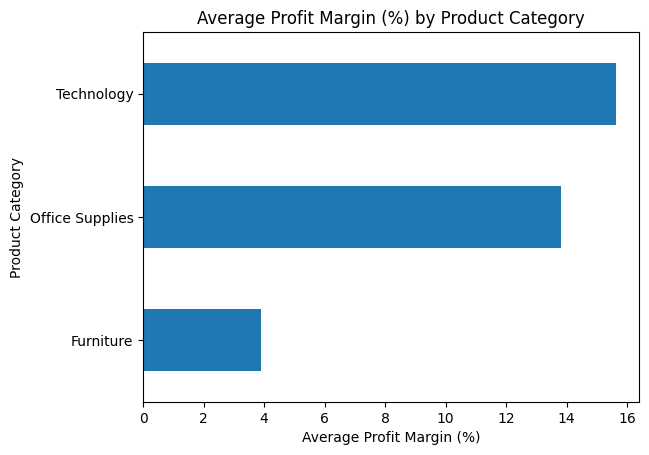

In [19]:
#create a nuw column (Profit Margin by percentage)
df["Profit Margin (%)"] = (df['Profit']/df['Sales'])*100
#Check the average profit margin for each category 
avg_profit_margin_by_category = df.groupby('Category')['Profit Margin (%)'].mean()
#Display profit margin by category
avg_profit_margin_by_category.plot(kind='barh')
# Graph title, x axis and y axis labelling
plt.title("Average Profit Margin (%) by Product Category")
plt.ylabel("Product Category")
plt.xlabel("Average Profit Margin (%)")

#### Observations:
- The average profit margin for technology products is the highest, followed by office supplies, and the furniture is the category with least average profit margin.

In [20]:
avg_profit_margin_by_category = df.groupby('Category')['Profit Margin (%)'].mean()

print(avg_profit_margin_by_category)

Category
Furniture           3.882204
Office Supplies    13.803029
Technology         15.613805
Name: Profit Margin (%), dtype: float64


### Profit Margin (%) by Sub-Category

In [21]:
df_grouped = df.groupby(['Category', 'Sub-Category']).agg({'Sales': 'sum', 'Profit': 'sum'})
df_grouped['Profit Margin (%)'] = df_grouped['Profit'] / df_grouped['Sales'] * 100

# Reset index to make category and sub-category columns
df_grouped.reset_index(inplace=True)
df_subcat_profit_margin = df_grouped.copy()
df_subcat_profit['Sub-Category'] = df_subcat_profit['Sub-Category'].astype(str)
df_subcat_profit_margin = df_subcat_profit_margin.sort_values(by='Profit Margin (%)', ascending=False)

# Create a vertical stacked bar chart
fig = px.bar(df_subcat_profit_margin, x='Sub-Category', y='Profit Margin (%)', color='Category', barmode='stack')


# Set title and axis labels
fig.update_layout(title='Profit Margin by Sub-Category', xaxis_title='Category', yaxis_title='Profit Margin (%)')

# Show plot
fig.show()

#### Observations:
- From the bar graph, it can be observed that office supplies is having the highest profit margin, followed by technology products and furniture.
- For office supplies, labels are generating the highest profit margin, followed by paper, envelopes, fasteners, art, appliances, binders, storage and supplies. Supplies is the only products in the office supplies category that undergo losses.
- For technology product, all the products are having positive profit margin. Copiers is having the highest profit margin, followed by accessories, phones and machines.
- For furniture, furnishings is having the highest profit margin, follow by chairs and bookcases and tables. Furnishings and chairs are having the positive profit margin while bookcases and tables are having negative profit margin.

In [22]:
#Profit Margin by customer segment
profit_margin_by_category = df.groupby('Segment')['Profit Margin (%)'].sum().reset_index()

fig_profit_margin_by_category= px.pie(profit_margin_by_category, 
             values='Profit Margin (%)', 
             names='Segment', 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig_profit_margin_by_category.update_traces(textposition='inside', textinfo='percent+label')
fig_profit_margin_by_category.update_layout(title_text='Profit Margin (%) by Customer Segment', title_font=dict(size=30))

fig_profit_margin_by_category.show()

#### Observations:
- From pie chart, it can be noticed the consumer segment is generating the highest profit margin, accounting for 48.4%, followed bu corporate at 30.4% and home office (21.2%).

In [23]:
df_hist_sub = df.copy()

# # Create subplots with 5 rows and 3 columns
# fig1 = make_subplots(rows=5, cols=3)
df_hist_sub = df_hist_sub.drop(columns=['Product Name', 'Order ID', 'Product ID', "Customer ID"])
columns_to_plot = df_hist_sub.columns[:15]
data_to_plot = df_hist_sub[columns_to_plot]
num_subplots = len(columns_to_plot)

# Specify the number of columns, rows
num_cols = 3
num_rows = (num_subplots + num_cols - 1) // num_cols

fig = sp.make_subplots(rows=num_rows, cols=num_cols, subplot_titles=columns_to_plot)

# Loop through the columns and create histograms for each column
for i, column in enumerate(columns_to_plot):
    # Calculate the row and column indices for the subplot
    row = i // 3 + 1
    col = i % 3 + 1
    

    fig.add_trace(go.Histogram(x=data_to_plot[column], nbinsx=150, name=column), row=row, col=col)

# Update subplot layout
fig.update_layout(
    title="Histograms of Superstore Data",
    showlegend=False,
    height=1750,
    width=1280
)

# Show plot
fig.show()

#### Observations:
- From the histogram, it can be revealed the distribution of the data obtain for each feature.
- For Segment, it can be observed that the highest frequency of values for this variable is found in the consumer segment, followed by corporate and home office. 
- For City, Henderson is having the highest frequecy of the frequency of values for this variable.
- For State, Kentucky is having the highest frequency and followed by New York.
- For Region, West Region is having the highest frequency of values, followed by East, Central and South region.
- For Category, office supplies is having highest frequency of values, followed by furniture and technology.
- For Sub Category, binders is having the highest frequency of value and followed by accesories.
- For Sales, the distribution is right-skewed, where sales that approaching 0 is having the highest frequency.
- For Quantity, the distribution is right-skewed, where quantity that is in between of 0 and 5 is having the highest frequency.
- For Discount, 0 is having the highest frequency of value and followed by 0.2.
- For Profit, profit that is approaching 0 is having the highest frequency of value.
- For Profit margin, the distribution is right-skewed.

## Data Transformation
Data transformation is a crucial step in data preprocessing that involves converting or modifying data in a way that makes it more suitable for analysis. There are several reasons why data transformation is necessary:

- **Data normalization**: 
  
  One of the primary reasons for data transformation is to normalize the data, which involves scaling the values of different variables to the same range. Normalization helps to prevent biases that can arise when one variable has much larger or smaller values than the others, and also ensures that the model is not sensitive to the units in which the data is measured.
  
- **Encoding categorical variables**: 
  
  Categorical variables, which take on discrete values rather than continuous values, cannot be used in their raw form in most machine learning models. Data transformation techniques such as one-hot encoding and label encoding can be used to convert categorical variables into numerical values that can be used in the analysis.
  
- **Feature engineering**: 
  
  Feature engineering is the process of creating new features or modifying existing features in a way that improves the performance of the model. Data transformation techniques such as log transformations, power transformations, and polynomial transformations can be used to create new features that capture the underlying patterns in the data.

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df_transform = df.copy()
df_transform = df_transform.drop(['Order ID', 'Order Date','City', 'Customer ID', 'Product ID', 'Product Name', 'Profit', 'Profit Margin (%)'], axis = 1)

# To identiy if is gain, loss or nil based on the column 'Profit'
p = df['Profit'].values.astype('O')

for j in range(len(p)):
    if p[j] > 0:
        p[j] = 'Gain'
    else:
        p[j] = 'Loss'

unique, counts = np.unique(p, return_counts=True)
dict(zip(unique, counts))

df_transform['Gain/Loss'] = p

catagorical_features = [i for i in df_transform.columns if df_transform.dtypes[i] == 'object']
for j in catagorical_features:
    print(j)
    print(sorted(df_transform[j].unique())) # sort in alphabetical order

# OrdinalEncoder
# List of columns to convert
columns_to_convert = ['Segment','State','Region','Category','Sub-Category','Gain/Loss']
for column in columns_to_convert:
    column_to_encode = df_transform[[column]]
    encoder = LabelEncoder()
    encoded_data = encoder.fit_transform(column_to_encode)
    df_transform[column] = encoded_data

df_transform.head()

Segment
['Consumer', 'Corporate', 'Home Office']
State
['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
Region
['Central', 'East', 'South', 'West']
Category
['Furniture', 'Office Supplies', 'Technology']
Sub-Category
['Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases', 'Chairs', 'Copiers', 'Envelopes', 'Fasteners', 'Furnishings', 'Labels', 'Machines', 'Paper', 'Phones', 'Storage', 'Supplies', 'Tables']
Gain/Los

Segment  State  Region  Category  Sub-Category     Sales  Quantity  \
0        0     15       2         0             4  261.9600         2   
1        0     15       2         0             5  731.9400         3   
2        1      3       3         1            10   14.6200         2   
3        0      8       2         0            16  957.5775         5   
4        0      8       2         1            14   22.3680         2   

   Discount  Gain/Loss  
0      0.00          0  
1      0.00          0  
2      0.00          0  
3      0.45          1  
4      0.20          0

In [25]:
# save the transform  data
filename = 'dataset/superstore_transform.csv'
# df_transform.to_csv(filename, encoding='utf-8', index = None, header=True)
print('dataset/superstore_transform.csv')

dataset/superstore_transform.csv


## Data Correlation
The heatmap is used to check the correlation between the feature variables and target variable. The correlation coeficient is in the range of `-1 to 1` that indicates the strength and direction of the linear relationship between the two variables. A correlation coefficient of **1** indicates a perfect positive correlation, while a correlation coefficient of **-1** indicates a perfect negative correlation. A correlation coefficient of **0** indicates no linear correlation between the variables.

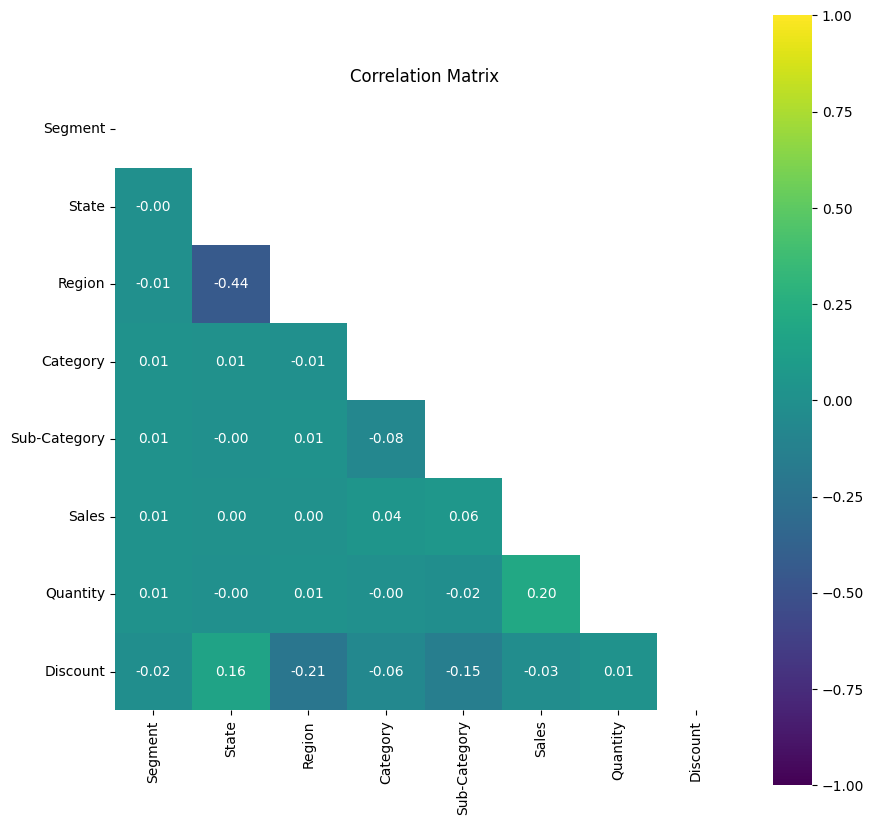

In [26]:
df_corr = df_transform.copy()

# Create a copy of the DataFrame with the target variable dropped
df_corr = df_corr.drop('Gain/Loss', axis=1)

# Create a correlation matrix
corr_matrix = df_corr.corr()

# Create a mask to hide the upper triangular portion of the heatmap
mask = np.zeros_like(corr_matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10,10))

# Create a heatmap of the correlation matrix using seaborn
sns.heatmap(corr_matrix, cmap='viridis', annot=True, vmin=-1, vmax=1, mask=mask, fmt=".2f", square=True, ax=ax)

# Set the title of the plot
ax.set_title('Correlation Matrix')

# Show the plot
plt.show()

In [27]:
# Create a correlation matrix with the target variable included
corr_with_target = df_transform.corr()['Gain/Loss'].sort_values(ascending=False)

# Print the correlation values
print(corr_with_target)

Gain/Loss       1.000000
Discount        0.742784
State           0.137532
Sales           0.020864
Quantity       -0.004572
Segment        -0.017900
Sub-Category   -0.035346
Category       -0.168627
Region         -0.197032
Name: Gain/Loss, dtype: float64


## Hypothesis Testing

In [28]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

ss_data = df_transform.copy()
ss_data
features = []
data =[]
# Iterate over each feature
for feature in ss_data.columns[:-1]:  # Assuming the target variable is the last column

    # Create a contingency table
    contingency_table = pd.crosstab(ss_data[feature], ss_data['Gain/Loss'])

    # Perform the chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    # Set the significance level
    alpha = 0.05

    # Compare the p-value with the significance level
    if p_value < alpha:
        features.append(feature)
        data.append(f"Reject the null hypothesis for feature '{feature}'. There is a significant relationship with the Gain/Loss variable.")
    else:
        features.append(feature)
        data.append(f"Fail to reject the null hypothesis for feature '{feature}'. There is no significant relationship with the Gain/Loss variable.")

data  = {
    'Feature' : features,
    'Remarks' : data,
}

pd.set_option('display.max_colwidth', None)
result = pd.DataFrame(data)
result

Feature  \
0       Segment   
1         State   
2        Region   
3      Category   
4  Sub-Category   
5         Sales   
6      Quantity   
7      Discount   

                                                                                                                        Remarks  
0   Fail to reject the null hypothesis for feature 'Segment'. There is no significant relationship with the Gain/Loss variable.  
1              Reject the null hypothesis for feature 'State'. There is a significant relationship with the Gain/Loss variable.  
2             Reject the null hypothesis for feature 'Region'. There is a significant relationship with the Gain/Loss variable.  
3           Reject the null hypothesis for feature 'Category'. There is a significant relationship with the Gain/Loss variable.  
4       Reject the null hypothesis for feature 'Sub-Category'. There is a significant relationship with the Gain/Loss variable.  
5              Reject the null hypothesis for feature 'Sales'. There is a significant relationship with the Gain/Loss variable.  
6  Fail to reject the null hypothesis for feature 'Quantity'. There is no significant relationship with the Gain/Loss variable.  
7           Reject the null hypothesis for feature 'Discount'. There is a significant relationship with the Gain/Loss variable.

## Modeling/Machine Learning

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from lazypredict.Supervised import LazyClassifier

import joblib

### Lazy Classifier
- To perform a quick check on the data by using lazy classifier and obtains the accuracy and f1 score of different machine learning techniques.

- A few of the machine learning will be selected and perform a more in depth model training and testing.

In [30]:
# copy df
df_lc= df_transform.copy()

# separate features and target variable
X = df_lc.drop('Gain/Loss', axis=1)
y = df_lc['Gain/Loss']

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# fit and predict using multiple machine learning models
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# print the accuracy score of each model
print(models)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:07<00:00,  3.83it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.95               0.91     0.91      0.95   
BaggingClassifier                  0.95               0.91     0.91      0.95   
DecisionTreeClassifier             0.94               0.91     0.91      0.94   
RandomForestClassifier             0.95               0.91     0.91      0.95   
LGBMClassifier                     0.95               0.91     0.91      0.95   
ExtraTreesClassifier               0.94               0.91     0.91      0.94   
ExtraTreeClassifier                0.92               0.89     0.89      0.92   
AdaBoostClassifier                 0.94               0.88     0.88      0.94   
KNeighborsClassifier               0.93               0.88     0.88      0.93   
LabelPropagation                   0.92               0.88     0.88      0.92   
LabelSpreading              

### Decision Tree Classifier

In [31]:
# copy df
df_ml = df_transform.copy()

# separate features and target variable
X = df_ml.drop('Gain/Loss', axis=1)
y = df_ml['Gain/Loss']

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.9394697348674337
F1 Score: 0.8442728442728443


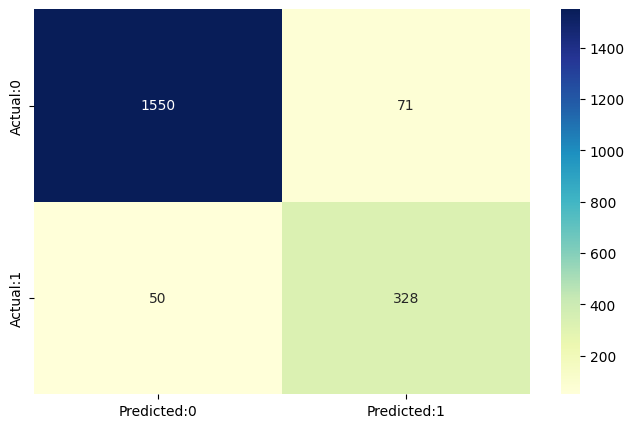

In [32]:
# initialize decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# fit the model using the training data
clf.fit(X_train, y_train)

# make predictions using the test data
y_pred = clf.predict(X_test)

# evaluate the model using accuracy, f1 score, and confusion matrix
accuracy_dt = accuracy_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred)
cm_dt = confusion_matrix(y_test, y_pred)

# To plot the confusion matrix
conf_matrix=pd.DataFrame(data=cm_dt,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print('Accuracy:', accuracy_dt)
print('F1 Score:', f1_dt)

### Random Forest Classifier

Accuracy: 0.9479739869934968
F1 Score: 0.8609625668449198


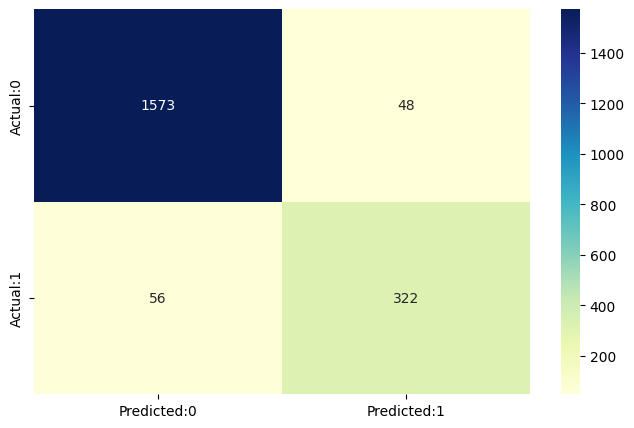

In [33]:
# initialize random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model using the training data
clf.fit(X_train, y_train)

# make predictions using the test data
y_pred = clf.predict(X_test)

# evaluate the model using accuracy, f1 score, and confusion matrix
accuracy_rf = accuracy_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
cm_rf = confusion_matrix(y_test, y_pred)

# To plot the confusion matrix
conf_matrix=pd.DataFrame(data=cm_rf,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print('Accuracy:', accuracy_rf)
print('F1 Score:', f1_rf)

### KNN Classifier Model

Accuracy: 0.8469234617308654
F1 Score: 0.5335365853658537


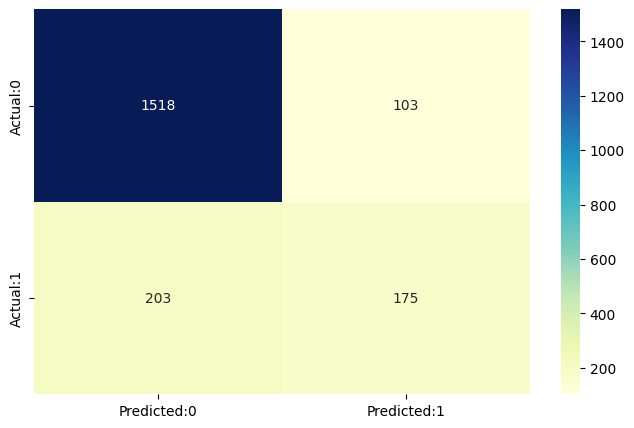

In [34]:
# initialize KNN Classifier
clf = KNeighborsClassifier(n_neighbors=5,weights='distance')

# fit the model using the training data
clf.fit(X_train, y_train)

# make predictions using the test data
y_pred = clf.predict(X_test)

# evaluate the model using accuracy, f1 score, and confusion matrix
accuracy_knn = accuracy_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)
cm_knn = confusion_matrix(y_test, y_pred)

# To plot the confusion matrix
conf_matrix=pd.DataFrame(data=cm_knn,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print('Accuracy:', accuracy_knn)
print('F1 Score:', f1_knn)

### Logistic Regression Model

Accuracy: 0.9059529764882441
F1 Score: 0.739612188365651


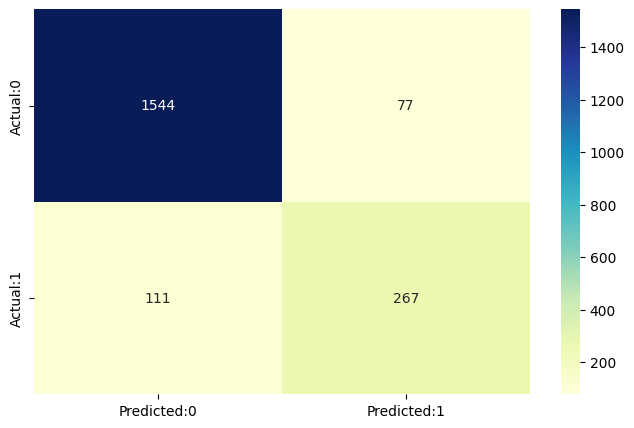

In [35]:
# initialize logistic regression
clf = LogisticRegression(random_state=42)

# fit the model using the training data
clf.fit(X_train, y_train)

# make predictions using the test data
y_pred = clf.predict(X_test)

# evaluate the model using accuracy, f1 score, and confusion matrix
accuracy_lr = accuracy_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)
cm_lr = confusion_matrix(y_test, y_pred)

# To plot the confusion matrix
conf_matrix=pd.DataFrame(data=cm_lr,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print('Accuracy:', accuracy_lr)
print('F1 Score:', f1_lr)

### XGB Classifier Model

Accuracy: 0.9494747373686844
F1 Score: 0.8647925033467203


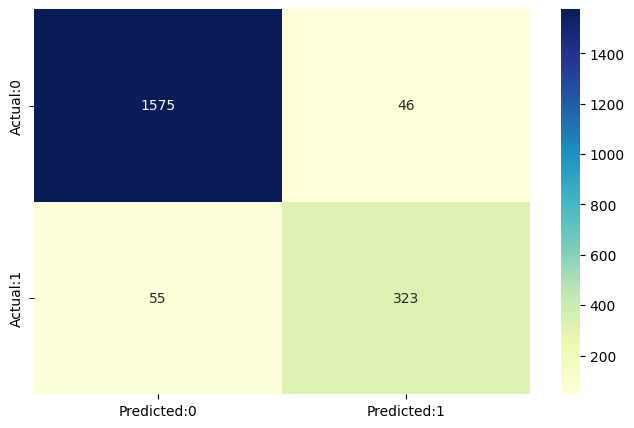

In [36]:
# initialize XGB Classifier
clf = XGBClassifier(random_state=42,n_estimators=100)

# fit the model using the training data
xgbclf.fit(X_train, y_train)

# make predictions using the test data
y_pred = xgbclf.predict(X_test)

# evaluate the model using accuracy, f1 score, and confusion matrix
accuracy_xgb = accuracy_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)
cm_xgb = confusion_matrix(y_test, y_pred)

# To plot the confusion matrix
conf_matrix=pd.DataFrame(data=cm_xgb,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print('Accuracy:', accuracy_xgb)
print('F1 Score:', f1_xgb)

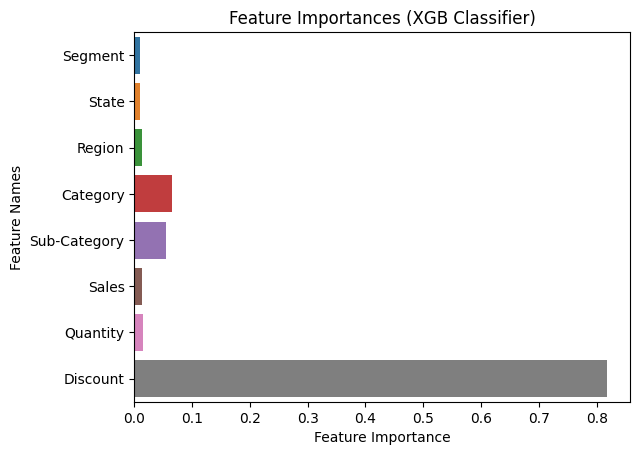

In [37]:
# Access feature importances from the trained model (XGB Classifier)
feature_importances = clf.feature_importances_

# Create a bar chart to visualize feature importances
sns.barplot(x=feature_importances, y=X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importances (XGB Classifier)')
plt.show()

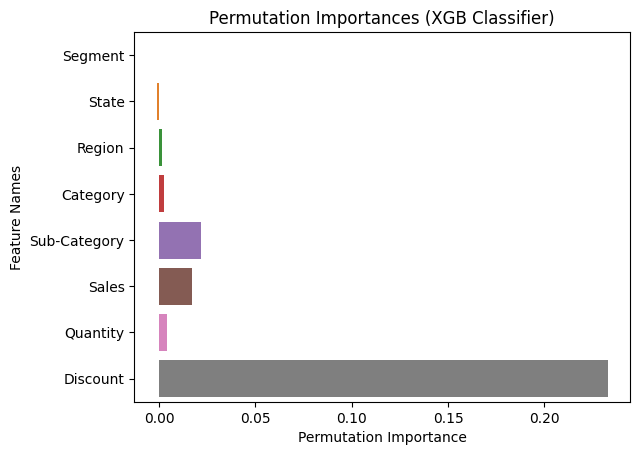

In [38]:
from sklearn.inspection import permutation_importance

# Compute permutation importances (XGB Classifier)
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Access feature importances from permutation importances
feature_importances = result.importances_mean

# Create a bar chart to visualize feature importances
sns.barplot(x=feature_importances, y=X.columns)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature Names')
plt.title('Permutation Importances (XGB Classifier)')
plt.show()

In [39]:
# save the model
# joblib.dump(clf, 'trained_model/xgbclassifier.joblib')
print('trained_model/xgbclassifier.job')

trained_model/xgbclassifier.job


In [40]:
# test with trained model
# select from existing saved data, df_transform
df_test = df_transform.copy()
df_test = df_test.drop('Gain/Loss', axis=1)
X = df_test

row_values = df_test.loc[df_test.index == 100].values.tolist()
X = np.array(row_values).reshape(1, -1)

# load the trained model
clf = joblib.load('trained_model/xgbclassifier.joblib')

# make predictions using the loaded model
y_pred = clf.predict(X)

predicted_labels = ['Loss' if pred == 1 else 'Gain' for pred in y_pred]
# print the predictions
print('Predictions:', predicted_labels)

Predictions: ['Gain']


### LightGBM Classifier Model

Accuracy: 0.9489744872436218
F1 Score: 0.8629032258064516


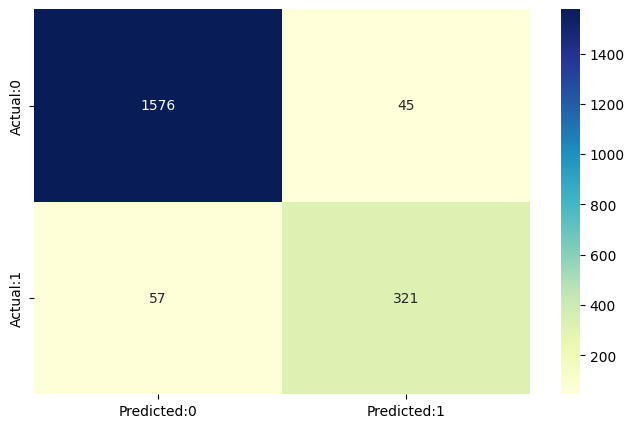

In [41]:
# initialize LGBM Classifier
clf = LGBMClassifier()

# fit the model using the training data
clf.fit(X_train, y_train)

# make predictions using the test data
y_pred = clf.predict(X_test)

# evaluate the model using accuracy, f1 score, and confusion matrix
accuracy_lgb = accuracy_score(y_test, y_pred)
f1_lgb = f1_score(y_test, y_pred)
cm_lgb = confusion_matrix(y_test, y_pred)

# To plot the confusion matrix
conf_matrix=pd.DataFrame(data=cm_lgb,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print('Accuracy:', accuracy_lgb)
print('F1 Score:', f1_lgb)

## Findings from ML

In [42]:
# Creates a summary table for the accuracy and f1 score of each trained model
data  = {
    'Model' : ['Decision Tree','Random Forest','KNN', 'Logestic Regression', 'XGBoost','LightGBM'],
    'Accuracy' : [accuracy_dt,accuracy_rf,accuracy_knn, accuracy_lr, accuracy_xgb, accuracy_lgb],
    'F1 Score' : [f1_dt, f1_rf, f1_knn, f1_lr, f1_xgb, f1_lgb]
}

result = pd.DataFrame(data)

# Highlight the model with best performance.
result.style.highlight_max()